In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive")
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/dataset/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 359 files belonging to 36 classes.


LOADING MODEL FOR TESTING

In [2]:
cnn=tf.keras.models.load_model("/content/drive/MyDrive/trained_model.h5")

([], [])

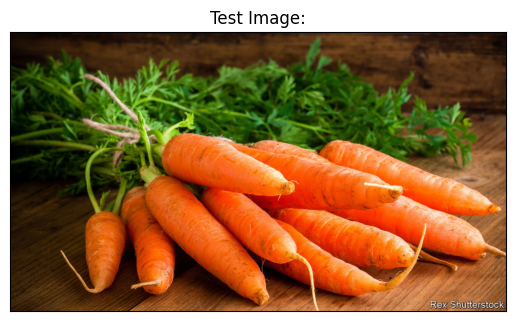

In [3]:
import cv2
imagePath="/content/drive/MyDrive/dataset/test/carrot/Image_1.jpg"
image=cv2.imread(imagePath)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("Test Image:")
plt.xticks([])
plt.yticks([])

In [4]:
image=tf.keras.preprocessing.image.load_img(imagePath,target_size=(64,64))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr = input_arr / 255.0
input_arr=np.array([input_arr])
predictions=cnn.predict(input_arr)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


In [5]:
print(predictions[0])

[6.0011207e-10 1.1636946e-17 7.5121929e-13 1.3477668e-07 5.9483790e-18
 1.5047732e-05 9.9992478e-01 5.5200393e-18 7.6439501e-06 8.3145109e-09
 1.6336504e-19 5.2185293e-14 8.5910959e-17 2.1634847e-11 3.4620982e-13
 8.6934743e-10 2.6794701e-16 1.4329913e-17 7.1425266e-13 7.8494816e-10
 1.6031681e-12 7.1480372e-08 4.5492296e-05 2.2101252e-09 1.7807187e-13
 2.4679963e-07 4.8491010e-08 2.3376814e-09 4.9296347e-07 1.7085390e-10
 7.8431543e-13 5.6371467e-09 4.3253505e-07 5.2141627e-06 2.6481416e-13
 4.0452883e-07]


In [6]:
print(max(predictions[0]))
predicted_class = np.argmax(predictions[0])
print(predicted_class)

0.9999248
6


In [7]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
print(f"Predicted class name is: {test_set.class_names[predicted_class]}")

Predicted class name is: carrot


🔹 "Batch" Ne Demek?

Batch = Bir seferde modele verdiğin örnek sayısıdır.
🎯 Neden Var?

Model aynı anda birden fazla örneği işleyerek:

    Daha verimli çalışır (özellikle GPU kullanılıyorsa)

    Daha stabil öğrenir (tek örnek yerine ortalama hata ile güncelleme yapılır)

🔢 Örnekle Açıklayalım

Diyelim ki eğitim verisinde 1.000 tane resim var. Ve sen şunu yazdın:

image_dataset_from_directory(..., batch_size=32)

Bu durumda:

    Her adımda modele 32 resim verilir.

    Bu 32 resim bir batch olur.

    Tüm 1000 resim bitene kadar 32’şer 32’şer işlenir.

📦 Bu durumda:

    1000 / 32 ≈ 32 batch olur → Yani 1 epoch içinde model 32 kez güncellenir.

🔁 Özet: Kavramlar
Terim	Anlamı
Sample	Tek bir veri (örneğin 1 resim)
Batch	Aynı anda verilen birkaç sample (örneğin 32 resim)
Epoch	Tüm verinin bir kere baştan sona modele verilmesi
Step	Bir batch’in işlenmesi. Yani 1 epoch = (veri/batch_size) steps
🧠 Peki input_arr=np.array([image]) derken ne oluyor?

Bu, bir batch boyutu = 1 olan örnek oluşturuyor. Yani:

input_arr.shape  →  (1, 64, 64, 3)

Burada:

    1: batch size (tek resim)

    64x64x3: resmin kendisi

Model, her zaman batch boyutlu giriş bekler.
✅ Kısacası:

    batch = "modele aynı anda verdiğin örnek sayısı"

    Eğitim sırasında öğrenmenin verimli ve dengeli olması için önemli

    Tahmin yaparken bile tek örnek verirken batch_size = 1 olarak vermelisin (yani np.expand_dims() ya da np.array([...]) kullanmalısın)

İstersen bunu grafikle veya canlı simülasyonla da gösterebilirim. Batch size’ı değiştirmenin etkisini anlamak ister misin?
Şunu dedin:
image=tf.keras.preprocessing.image.load_img(imagePath,target_size=(64,64))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr = input_arr / 255.0
input_arr=np.array([input_arr])
predictions=cnn.predict(input_arr) her satırda napıldığını detaylıca anlat
ChatGPT:

Harika, şimdi bu satır satır yazdığın kodu detaylı, teknik ama basit anlaşılır bir dille açıklıyorum. Bu kod, bir resmi alıp modeline vererek sınıf tahmini yapmanı sağlar.
🧾 KOD:

image = tf.keras.preprocessing.image.load_img(imagePath, target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = input_arr / 255.0
input_arr = np.array([input_arr])
predictions = cnn.predict(input_arr)

🔍 1. Satır:

image = tf.keras.preprocessing.image.load_img(imagePath, target_size=(64,64))

✔️ Ne yapar?

    imagePath ile belirttiğin dosya yolundaki görseli yükler.

    target_size=(64, 64) ⇒ Yüklenen görsel, CNN modelinin beklediği boyuta yeniden boyutlandırılır.

    Renk modu varsayılan olarak 'RGB' olur. Yani (64, 64, 3) şeklinde gelir.

🧠 Neden gerekli?

Modelin giriş boyutu input_shape=(64, 64, 3) olduğundan, gelen her görselin bu boyutta olması gerekir. Aksi takdirde hata alırsın.
🔍 2. Satır:

input_arr = tf.keras.preprocessing.image.img_to_array(image)

✔️ Ne yapar?

    PIL.Image formatındaki resmi bir NumPy dizisine çevirir.

    Sonuç: (64, 64, 3) boyutlu, dtype’ı float32 olan bir NumPy array elde edilir.

🧠 Neden?

TensorFlow modelleri, resmi işlemeye başlamadan önce onu sayısal tensöre (NumPy array) dönüştürmek zorundadır.
🔍 3. Satır:

input_arr = input_arr / 255.0

✔️ Ne yapar?

    Piksel değerlerini 0–255 aralığından 0–1 aralığına çevirir.

    Yani: 255 = beyaz → 1.0, 0 = siyah → 0.0

🧠 Neden?

Modelin eğitim sırasında bu normalizasyon yapılmışsa (ki senin modelde Rescaling(1./255) kullanılmış), burada da yapılmalı. Aksi takdirde model, gerçek dışı değerlere maruz kalır ve yanlış tahmin yapar.
🔍 4. Satır:

input_arr = np.array([input_arr])

✔️ Ne yapar?

    Veriyi bir listeye alıp NumPy dizisine dönüştürür.

    Bu işlem sayesinde şekli şuna dönüşür:

    (1, 64, 64, 3)

    Yani tek bir görsel içeren bir batch oluşur.

🧠 Neden?

Modelin .predict() fonksiyonu, giriş olarak batch formatında veri bekler. Batch size 1 bile olsa, ilk eksen (örnek sayısı) mutlaka olmalı.
🔍 5. Satır:

predictions = cnn.predict(input_arr)

✔️ Ne yapar?

    CNN modeline input_arr'ı verir.

    Tahmin sonucu bir NumPy array olarak döner:

    predictions.shape → (1, 36)

    Buradaki 36, sınıf sayısıdır.

    Her değer: O sınıfa ait olma olasılığı (0.0–1.0 arasında)

    En yüksek olasılığa sahip olan indeks, tahmin edilen sınıftır.

🔧 Devamında:

predicted_class = np.argmax(predictions)

    En yüksek olasılığı bulur (örneğin sınıf 12).

    class_names[predicted_class] ile sınıf adını alabilirsin.